# SVM Classifier
## Import Packages

In [54]:
# For data management
import pandas as pd
import numpy as np
import pickle

from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

# For plotting
import matplotlib.pyplot as plt
%matplotlib inline 

## Load Dataset

In [2]:
# LOAD FEATURES AND LABELS FROM PICKLE

# Note: Pickles are mask, no mask, incorrect wear of mask dataset in grayscale
# See data pre-processing for more information

pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in) # 3D Feature set

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in) # 1D Target set

pickle_in = open("data.pickle", "rb")
data = pickle.load(pickle_in) # 2-D Feature Set, Data matrix will serve as X

In [3]:
# Dataset class distribution for mask, no mask, incorrect wear of mask

print('# of Samples:', len(y))
print('# of Correctly Worn Mask:', (y == 0).sum())
print('# of Incorrectly Worn Mask:', (y == 1).sum())

# of Samples: 20905
# of Correctly Worn Mask: 10471
# of Incorrectly Worn Mask: 10434


In [4]:
#Convert Numpy to Dataframe
# Get Column Names
cols = []
for i in range(0, len(data[0])):
    cols.append("P" + str(i))

# Convert to Dataframe
numpy_data = data
X = pd.DataFrame(data=numpy_data, columns=[cols])
print(X.head())

y = pd.DataFrame(data=y, columns=["Mask_Target"])
print(y.head())

    P0   P1   P2   P3   P4   P5   P6   P7   P8   P9  ... P4086 P4087 P4088  \
0  198  197  199  203  199  201  197  196  191  191  ...    48    45    47   
1    0    0    0    0    0    0    0    0    0    0  ...     0     0     0   
2   43   39   34   39   43   37   44   41   36   32  ...    56    36    59   
3  216  217  217  219  218  218  219  222  221  219  ...   201   200   200   
4  226  225  213  193  177   88  198  236  235  238  ...    72    98    51   

  P4089 P4090 P4091 P4092 P4093 P4094 P4095  
0    45    44    46    59   208    50   168  
1     0     0     0     0     0     0     0  
2    54    39    50    60    48    60    60  
3   200   201   205   201   195   201   204  
4    71   160    76    90    71    34    34  

[5 rows x 4096 columns]
   Mask_Target
0            0
1            0
2            0
3            0
4            0


In [5]:
# Shape of Feature and Target Sets
# There are 17,687 samples
# See Data preprocessing for more information

print('\nImage Data Shape:', X.shape) # Feature sets are 64X64 images flatten to a 4096 feature vector
print('Image Data Shape Features:', data.shape)
print('Image Data Shape Target:', y.shape)


Image Data Shape: (20905, 4096)
Image Data Shape Features: (20905, 4096)
Image Data Shape Target: (20905, 1)


In [6]:
# Normalize the pixel values
X = X / 255.0

In [7]:
# Split our data into testing and training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Print the length and width of our testing data.
print('Length of our Training data: ', len(X_train), '\nLength of our Testing data: ', len(X_test))

Length of our Training data:  16724 
Length of our Testing data:  4181


## SVM Classifier 

### Fit Model

In [8]:
model_svm = svm.SVC()
model_svm.fit(X_train, y_train)

C:\Users\Teoh\.conda\envs\ResearchProject\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Teoh\.conda\envs\ResearchProject\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

## Evaluate performance for using 100% of the datase

In [9]:
### 1. Get and print a baseline accuracy score.
y_pred = model_svm.predict(X_test)
accuracy = model_svm.score(X_test, y_test)
print("Accuracy %f" % accuracy)
metrics.accuracy_score(y_true=y_test, y_pred=y_pred)

C:\Users\Teoh\.conda\envs\ResearchProject\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Teoh\.conda\envs\ResearchProject\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Accuracy 0.945946


0.9459459459459459

### Confusion Matrix

Text(0.5, 1.0, 'Accuracy Score, No Hyperparameter Tuning: 0.9459459459459459')

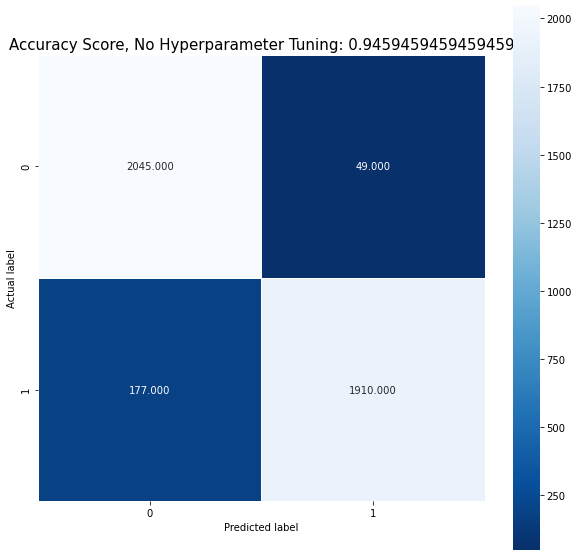

In [19]:
# Calculate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,10))
# Heatmap visualization of accuracy
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Accuracy Score, No Hyperparameter Tuning: {0}'.format(accuracy)
plt.title(title,size=15)

### Classification Report

In [24]:
# RECALL
# CLASS 0: CORRECT WEAR OF MASK
# CLASS 1: INCORRECT WEAR OF MASK

print("\nClassification Report\n")
print(metrics.classification_report(y_test, y_pred))


Classification Report

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2094
           1       0.97      0.92      0.94      2087

    accuracy                           0.95      4181
   macro avg       0.95      0.95      0.95      4181
weighted avg       0.95      0.95      0.95      4181



## Visualization of Trees

In [29]:
import cv2

def predictImage(filename):
    img1 = cv2.imread(filename)
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    img2 = cv2.imread(filename,cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img2, (64,64))
    X = np.array(img_resized).flatten().reshape(1, 64*64)
    X = pd.DataFrame(data=X, columns=[cols])
    X = X / 255.0
    val = model_svm.predict(X)
    print(val)
    if val == 1:
        
        plt.xlabel("Incorrectly Worn",fontsize=30)
        
    
    elif val == 0:
        
        plt.xlabel("Correctly Worn",fontsize=30)

C:\Users\Teoh\.conda\envs\ResearchProject\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[0]


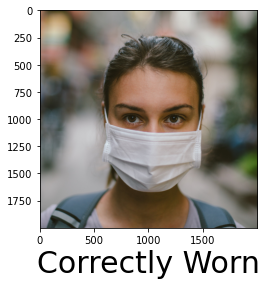

In [32]:
predictImage("test_mask.jpg")

C:\Users\Teoh\.conda\envs\ResearchProject\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[1]


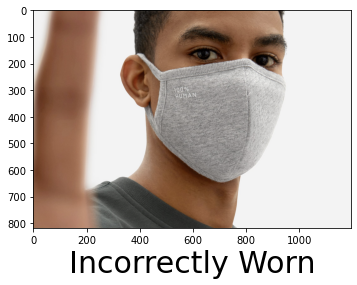

In [33]:
predictImage("test_mask2.png")

C:\Users\Teoh\.conda\envs\ResearchProject\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


[0]


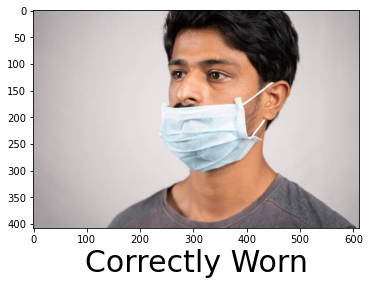

In [34]:
predictImage("test_incorrectlymask.jpg")

[1]


C:\Users\Teoh\.conda\envs\ResearchProject\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


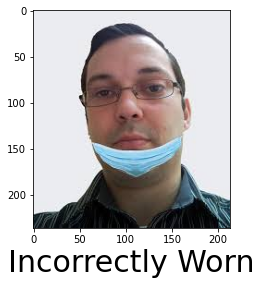

In [35]:
predictImage("test_incorrectlymask2.jpg")